# Set up the Tableau Workspace for data analysis

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

import sweetviz

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("LittleLemondata.csv", parse_dates=["Order Date"])

In [3]:
df.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row Number     21000 non-null  int64         
 1   Order ID       21000 non-null  object        
 2   Order Date     21000 non-null  datetime64[ns]
 3   Delivery Date  21000 non-null  object        
 4   Customer ID    21000 non-null  object        
 5   Customer Name  21000 non-null  object        
 6   City           21000 non-null  object        
 7   Country        21000 non-null  object        
 8   Postal Code    21000 non-null  object        
 9   Country Code   20958 non-null  object        
 10  Cost           21000 non-null  float64       
 11  Sales          21000 non-null  float64       
 12  Quantity       21000 non-null  int64         
 13  Discount       21000 non-null  float64       
 14  Delivery Cost  21000 non-null  float64       
 15  Course Name    2100

In [5]:
df["Profit"] = df["Sales"] - df["Cost"]

In [6]:
df.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00


In [7]:
#df.to_csv("modified.csv", index=False)

In [8]:
df.describe()

,Row Number,Cost,Sales,Quantity,Discount,Delivery Cost,Profit
count,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00,21000.00
mean,10500.50,147.04,220.56,2.12,49.16,50.98,73.52
std,6062.32,76.57,114.85,0.78,31.53,28.45,38.28
min,1.00,44.57,66.86,1.00,9.12,1.11,22.29
25%,5250.75,91.84,137.76,1.75,20.00,26.64,45.92
50%,10500.50,125.00,187.50,2.00,47.84,51.11,62.50
75%,15750.25,210.00,315.00,3.00,80.34,76.12,105.00
max,21000.00,320.00,480.00,3.00,99.24,99.91,160.00


In [9]:
df.columns

Index(['Row Number', 'Order ID', 'Order Date', 'Delivery Date', 'Customer ID', 'Customer Name', 'City', 'Country', 'Postal Code', 'Country Code', 'Cost', 'Sales', 'Quantity', 'Discount', 'Delivery Cost', 'Course Name', 'Cuisine Name', 'Starter Name', 'Desert Name', 'Drink', 'Sides', 'Profit'], dtype='object')

## Data Visualization

In the first task, you need to create a bar chart that shows customers sales and filter data based on sales with at least $70.

In [10]:
df2 = df[df["Sales"] >= 70.00]

In [11]:
df2

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,16721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,649-7309,CO,320.00,480.00,2,98.01,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,160.00
20996,17721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,1141350020,CO,93.13,139.69,2,73.09,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,46.56
20997,18721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,987-1453,CO,75.00,112.50,2,97.48,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,37.50
20998,19721,67-723-0322,2022-03-13,7/1/2023,69-530-7688,Devonne Whal,Balboa,Colombia,993-1191,CO,144.09,216.13,2,51.05,11.01,Greek salad,Greek,Hummus,Greek yoghurt,Athens White wine,Tapas,72.04


In [12]:
df2.groupby(["Customer Name"])["Sales"].sum()

Customer Name
Aaron Cromley       4527.56
Abigail Struis      4323.54
Adah Adamczewski    4812.30
Adaline Reichartz   4301.04
Adamo Rumens        4812.30
                      ...  
Zita Coldbath       4631.37
Zolly Heinzel       4466.61
Zora Hanalan        4728.87
Zorana Diggin       4453.78
Zorine Delacourt    4453.78
Name: Sales, Length: 1000, dtype: float64

In [13]:
task1 = pd.DataFrame(df2.groupby(["Customer Name"])["Sales"].sum())

In [14]:
task1

,Sales
Customer Name,
Aaron Cromley,4527.56
Abigail Struis,4323.54
Adah Adamczewski,4812.30
Adaline Reichartz,4301.04
Adamo Rumens,4812.30
...,...
Zita Coldbath,4631.37
Zolly Heinzel,4466.61
Zora Hanalan,4728.87


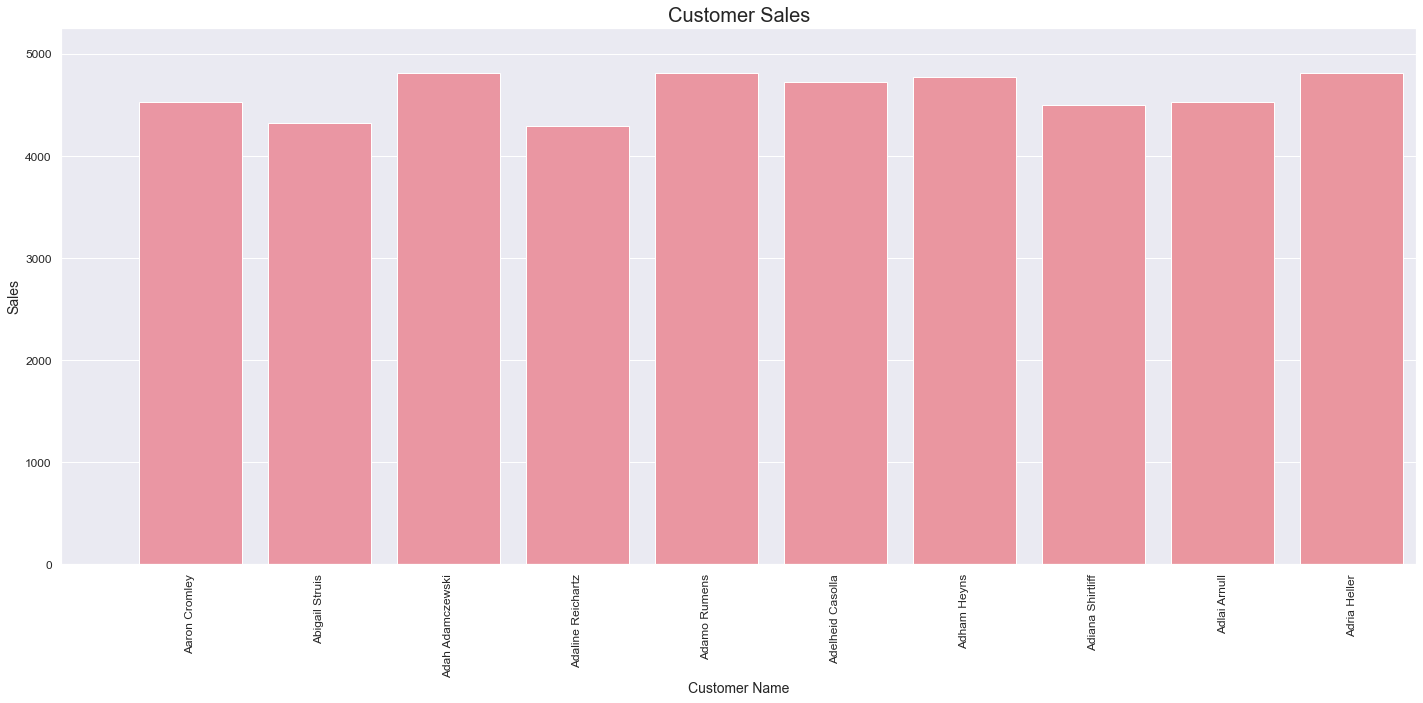

In [15]:
# Sort Barplots by Values and Single Plot

fig = plt.figure(figsize=(20,10))


sns.barplot(x=task1.index, y=task1.Sales, data=task1)
plt.title("Customer Sales", size=20)
plt.xlabel("Customer Name")
#plt.ylabel("Average Ticket Prices")
plt.xticks(rotation=90)
#plt.ticklabel_format(style='plain', axis='y')
plt.xlim(-1, 9.5)
plt.tight_layout()
plt.show()

In the second task, you need to create a line chart to show the sales trend from 2019 to 2022.

In [16]:
df3 = df[df["Order Date"] < "2023-01-01"]

In [17]:
df3.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00


In [18]:
df3["Order Date"].min()

Timestamp('2019-01-10 00:00:00')

In [19]:
df3["Order Date"].max()

Timestamp('2022-12-31 00:00:00')

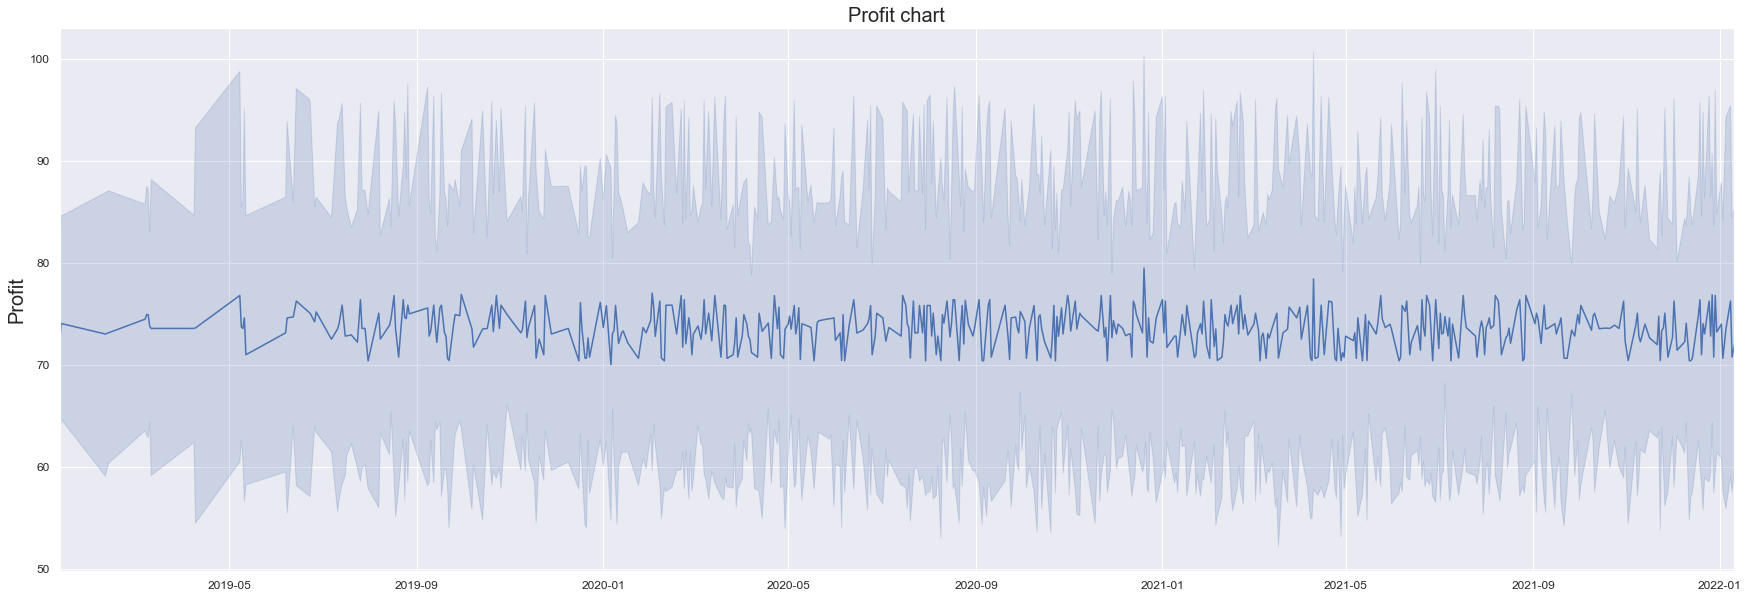

In [20]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df3["Order Date"], y=df3.Profit, data=df3, estimator='mean')
plt.title("Profit chart", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("Profit", fontsize=20)
plt.xlim('2019-01-10', '2022-01-10')
#plt.legend(['',''])
plt.show()

In the third task, you need to create a Bubble chart of sales for all customers. The chart should show the names of all customers. Once you roll over a bubble, the chart should show the name, profit and sale.

In [21]:
df.groupby(["Customer Name"])["Sales","Profit"].sum()

,Sales,Profit
Customer Name,,
Aaron Cromley,4661.27,1553.76
Abigail Struis,4457.25,1485.75
Adah Adamczewski,4812.30,1604.10
Adaline Reichartz,4434.75,1478.25
Adamo Rumens,4812.30,1604.10
...,...,...
Zita Coldbath,4631.37,1543.79
Zolly Heinzel,4600.32,1533.44
Zora Hanalan,4728.87,1576.29


In [22]:
df4 = pd.DataFrame(df.groupby(["Customer Name"])["Sales","Profit"].sum())

In [23]:
df4

,Sales,Profit
Customer Name,,
Aaron Cromley,4661.27,1553.76
Abigail Struis,4457.25,1485.75
Adah Adamczewski,4812.30,1604.10
Adaline Reichartz,4434.75,1478.25
Adamo Rumens,4812.30,1604.10
...,...,...
Zita Coldbath,4631.37,1543.79
Zolly Heinzel,4600.32,1533.44
Zora Hanalan,4728.87,1576.29


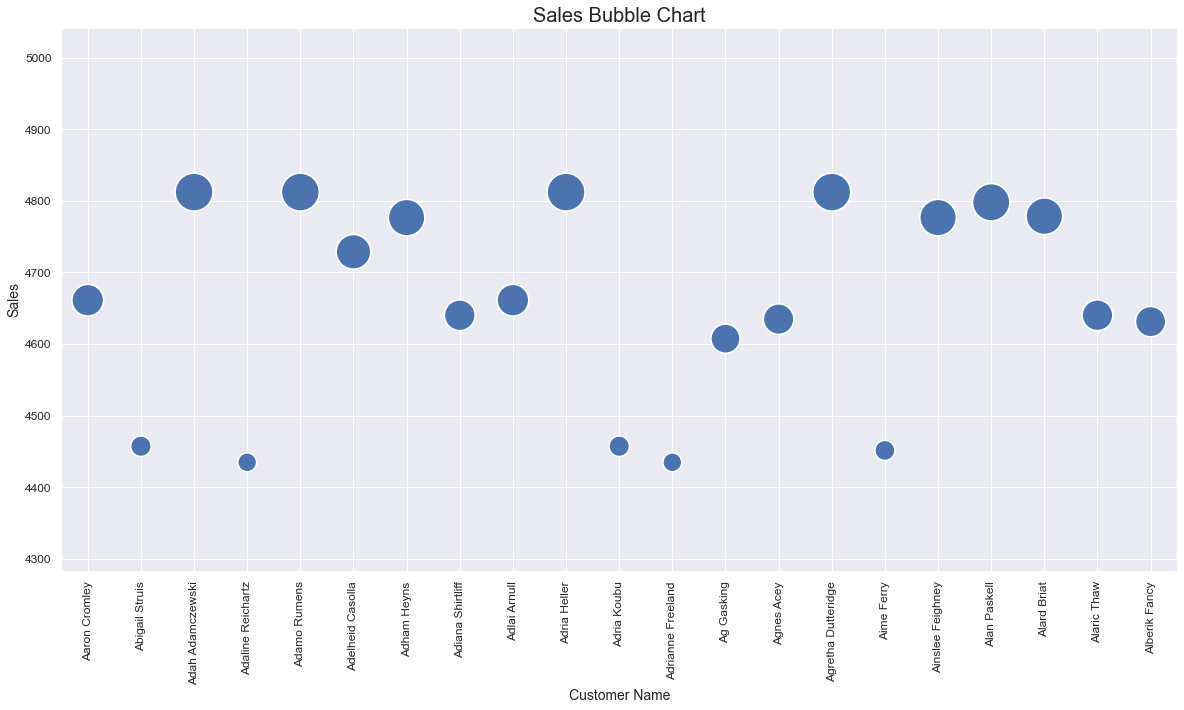

In [24]:
plt.figure(figsize=(20,10))

sns.scatterplot(x=df4.index, y=df4.Sales, size='Profit', data=df4, legend=False, sizes=(20,2000))
plt.title("Sales Bubble Chart", fontsize=20)
#plt.xlabel("Flight Number",fontsize=20)
#plt.ylabel("Launch Site",fontsize=20)
plt.xlim(-0.5, 20.5)
plt.xticks(rotation = 90)
plt.show()

In this task, you need to compare the sales of the three different cuisines sold at Little Lemon. Create a Bar chart that shows the sales of the Turkish, Italian and Greek cuisines.

In [25]:
df3.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00


In [26]:
df3.groupby("Cuisine Name").sum()

,Row Number,Cost,Sales,Quantity,Discount,Delivery Cost,Profit
Cuisine Name,,,,,,,
Greek,54893769,779435.97,1169153.96,10458,256964.57,272501.46,389717.98
Italian,109814922,1537555.91,2306333.86,18333,514305.95,528551.52,768777.95
Turkish,55135500,761790.33,1142685.50,15750,258158.21,266581.77,380895.17


In [27]:
df3["Year"] = df3["Order Date"].dt.year

In [28]:
df3.head()

,Row Number,Order ID,Order Date,Delivery Date,Customer ID,Customer Name,City,Country,Postal Code,Country Code,Cost,Sales,Quantity,Discount,Delivery Cost,Course Name,Cuisine Name,Starter Name,Desert Name,Drink,Sides,Profit,Year
0,975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,62493605,CN,168.27,252.41,2,30.00,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,84.13,2019
1,1975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,104358894,CN,69.38,104.07,2,9.12,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,34.69,2019
2,2975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,-83272656.67,CN,190.00,285.00,2,47.84,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,95.00,2019
3,3975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,584 01,CN,52.08,78.12,2,17.40,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,26.04,2019
4,4975,92-392-7061,2019-06-23,10/10/2019,48-951-1953,Lowrance Kleinmintz,Beigang,China,33911,CN,310.00,465.00,2,37.04,67.47,Pizza,Italian,Hummus,Cheesecake,Italian Coffee,Bruschetta,155.00,2019


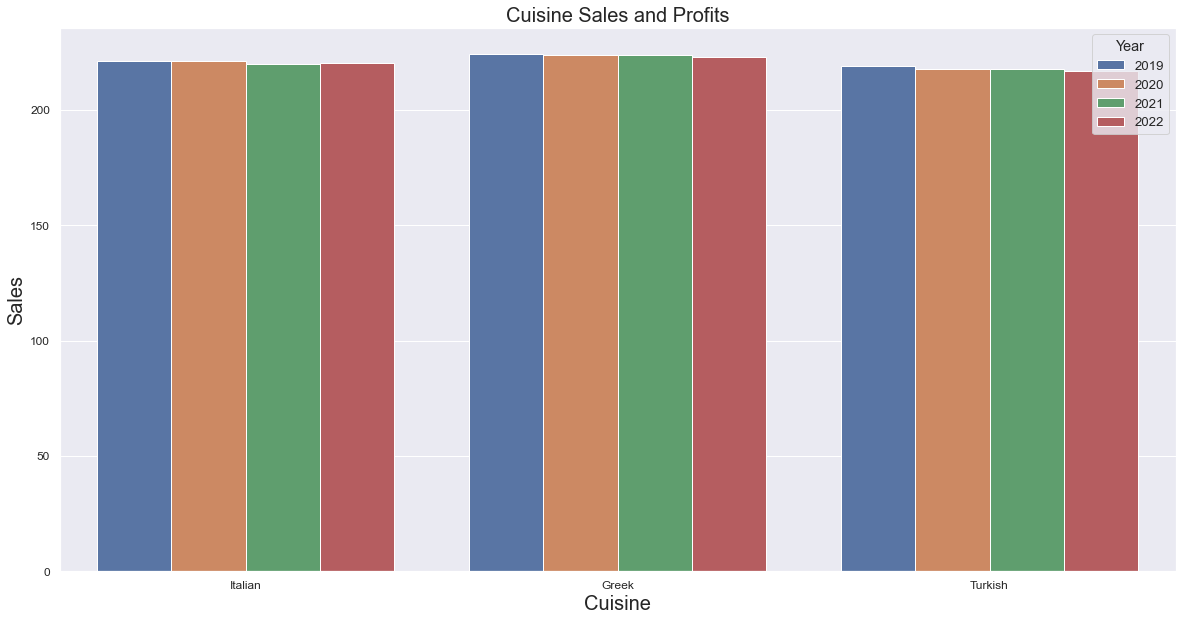

In [29]:
plt.figure(figsize=(20,10))


sns.barplot(y="Sales", x="Cuisine Name", hue="Year", data=df3, ci=None)
plt.xlabel("Cuisine",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.title("Cuisine Sales and Profits", fontsize=20)

plt.show()

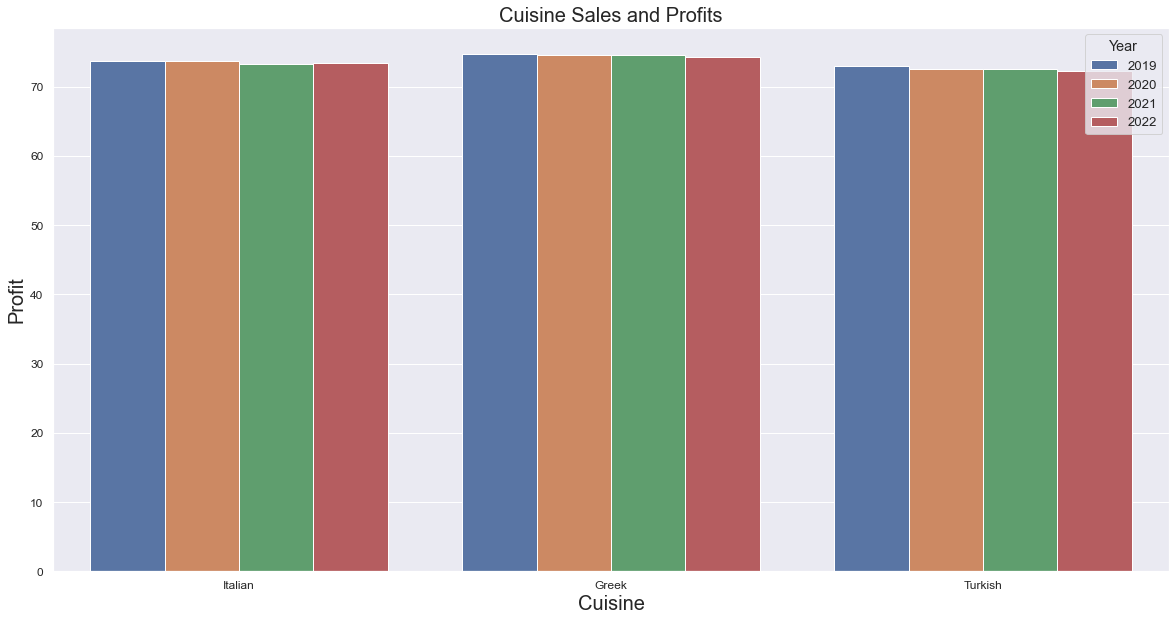

In [30]:
plt.figure(figsize=(20,10))


sns.barplot(y="Profit", x="Cuisine Name", hue="Year", data=df3, ci=None)
plt.xlabel("Cuisine",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Cuisine Sales and Profits", fontsize=20)

plt.show()

In this final task, you need to create an interactive dashboard that combines the Bar chart called Customers sales and the Sales Bubble Chart. 

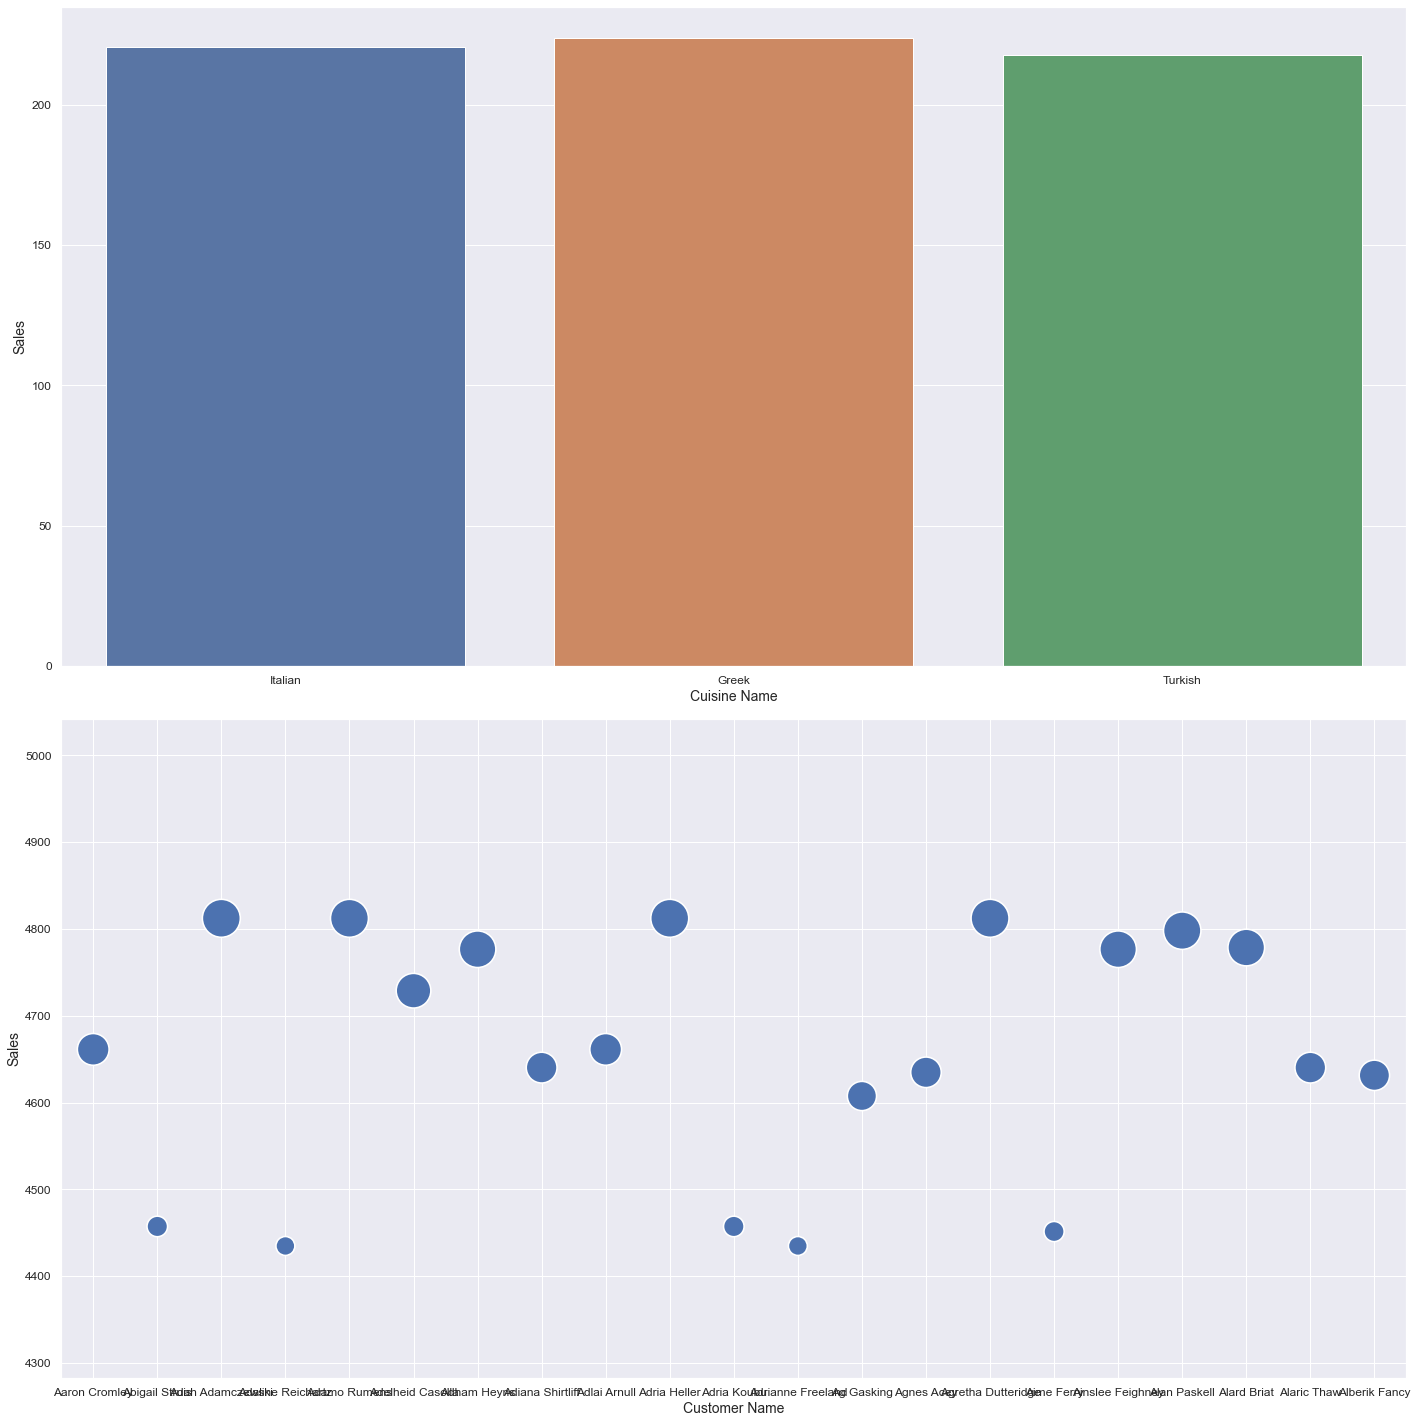

In [50]:
fig, ax = plt.subplots(2,1, sharex=False, figsize=(20,20))
#fig.suptitle('Main Title')


sns.barplot(x="Cuisine Name", y="Sales", data=df3, ci=None, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Cuisine Name")
ax[0].set_ylabel("Sales")

sns.scatterplot(x=df4.index, y=df4.Sales, size='Profit', data=df4, legend=False, sizes=(20,2000), ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Customer Name")
ax[1].set_ylabel("Sales")
ax[1].set_xlim(-0.5, 20.5)

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

#### Python code done by Dennis Lam